In [23]:
import io
import os
import requests

from PIL import Image
import matplotlib.pyplot as plt
from src.client import Client

In [21]:
with open(os.path.join('.', 'src',
                       'example_urls.txt'), 'r') as file:
    EXAMPLE_URLS = file.read().split('\n')

Вспомогательные функции для простой отрисовки изображений

In [4]:
def read_img(url):
    '''
    Загрузка изображения по ссылке в виде PIL.Image.

    :param url: URL на изображение
    :return: PIL.Image с изображением.
    '''
    req_img = requests.get(url).content
    img = Image.open(io.BytesIO(req_img))
    return img


def draw_response(url, result):
    '''
    Отрисовка изображений после обработки.

    :param url: URL на изображение
    :param result: результат, принятый от сервиса.
    '''
    orig_img = read_img(url)
    subplot_num = len(result) + 1 if result is not None else 1
    plt.close()
    plt.figure(figsize=(5 * subplot_num,5))
    
    plt.subplot(1, subplot_num, 1)
    plt.imshow(orig_img)

    if subplot_num >= 2:
        plt.subplot(1, subplot_num, 2)
        plt.imshow(result[0])
    
    if subplot_num == 3:
        plt.subplot(1, subplot_num, 3)
        plt.imshow(result[1])
    
    plt.show()

Инициализация клиенстского интерфейса.

В качестве аргумента нужно подать строку с адресом сервера. В случае локальной отладки это http://127.0.0.1:8080.

На виртуальной машине запущен докер-контейнер с сервисом на CPU. \
Для его использования можно инициаилизировать клиент с адресом http://51.250.93.34:8080.

На друго виртуальной машине запущен докер-контейнер с сервисом на GPU. \
Для его использования можно инициаилизировать клиент с адресом http://158.160.60.11:8080/.

In [5]:
# cl = Client('http://127.0.0.1:8080')
# cl = Client('http://51.250.93.34:8080')
cl = Client('http://158.160.60.11:8080')

Запросы отправляются методом класса Client.process_url \
В качестве аргументов используется строка со ссылкой на изображение и режим. \
В данном случае используются изображений из случайного набора, хранящегося в client.py

Для отрисовки используется функция draw_response, которая принимает ссылку на оригинальное изображение и результат обработки.

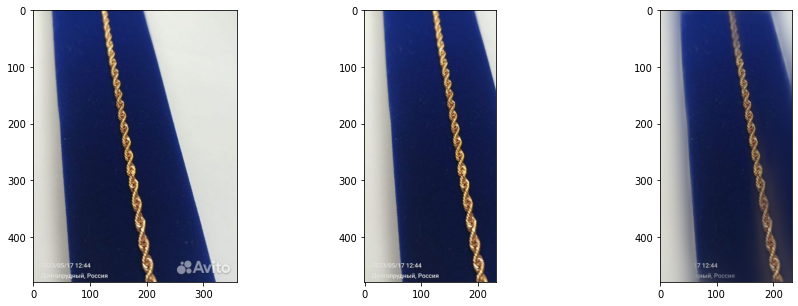

In [6]:
result = cl.process_url(EXAMPLE_URLS[0],
               mode='both')

draw_response(EXAMPLE_URLS[0], result)

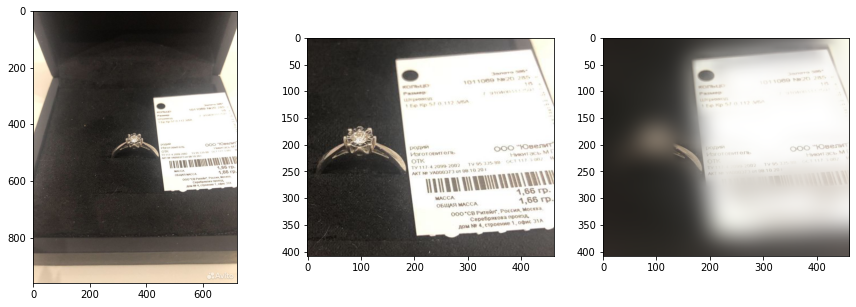

In [8]:
result = cl.process_url(EXAMPLE_URLS[1],
               mode='both')

draw_response(EXAMPLE_URLS[1], result)

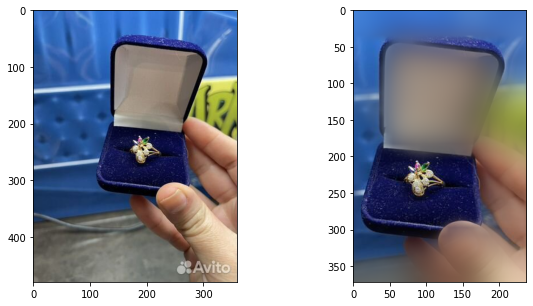

In [9]:
result = cl.process_url(EXAMPLE_URLS[2],
               mode='blur')

draw_response(EXAMPLE_URLS[2], result)

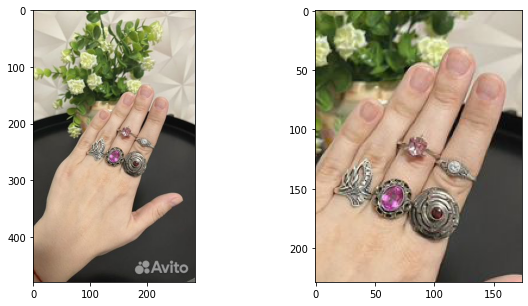

In [12]:
result = cl.process_url(EXAMPLE_URLS[3],
               mode='crop')

draw_response(EXAMPLE_URLS[3], result)

В отдельных случаях одна или обе модели не определеют на изображении никаких объектов. В этом случае сервер вернет внутреннюю ошибку с кодом 500.

In [13]:
result = cl.process_url(EXAMPLE_URLS[4],
               mode='both')
draw_response(EXAMPLE_URLS[4], None)

RuntimeError: 500 Error! Model didn't find an object on the image.

Если сервис не может получить изображение по ссылке, пользователь получит ошибку

In [14]:
result = cl.process_url(r'https://60.img.avito.st/image/1/1',
               mode='both')

RuntimeError: 400 Error! Could not extract image from the url

Также ошибка выводится в случае, если был задан некорректный режим.

In [15]:
result = cl.process_url(EXAMPLE_URLS[0],
               mode='sandwich')

RuntimeError: 400 Error! Mode has to be in ['blur', 'crop', 'both'].